c:\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [32]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

def load_images_and_labels(folder):
    images = []
    labels = []
    valid_extensions = ('.jpg')
    for image_filename in os.listdir(folder):
        if not image_filename.lower().endswith(valid_extensions):
            continue
        image_path = os.path.join(folder, image_filename)
        try:
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(100, 100))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            label = image_filename.split('_')[0]  
            labels.append(label)
        except Exception as e:
            print(f"Error reading {image_path}: {str(e)}")
    return np.array(images), np.array(labels)

train_data_dir = 'C:\\Users\\shawn\\Downloads\\archive\\train'
test_data_dir = 'C:\\Users\\shawn\\Downloads\\archive\\test'

X_train, y_train = load_images_and_labels(train_data_dir)
X_test, y_test = load_images_and_labels(test_data_dir)


le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)


c:\Python312\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model():
    model = Sequential()
    model.add(Input(shape=(100, 100, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))  
    return model

cnn_model = create_cnn_model()
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [34]:
batch_size = 32
epochs = 25

X_train = X_train / 255.0
X_test = X_test / 255.0

history = cnn_model.fit(X_train, y_train_categorical, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test_categorical))


Epoch 1/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.3913 - loss: 1.3472 - val_accuracy: 0.6167 - val_loss: 0.9377
Epoch 2/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.6178 - loss: 0.9398 - val_accuracy: 0.6167 - val_loss: 1.0217
Epoch 3/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.7432 - loss: 0.7520 - val_accuracy: 0.8333 - val_loss: 0.5406
Epoch 4/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8735 - loss: 0.4379 - val_accuracy: 0.8500 - val_loss: 0.4757
Epoch 5/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9049 - loss: 0.3189 - val_accuracy: 0.8667 - val_loss: 0.5081
Epoch 6/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.8927 - loss: 0.2986 - val_accuracy: 0.8833 - val_loss: 0.5524
Epoch 7/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9270 - loss: 0.2635 - val_accuracy: 0.9167 - val_loss: 0.5020
Epoch 8/25
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.9300 - loss: 0.2044 - val_accuracy: 0.8500 - val_loss: 0.4791


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001E170643100> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
classification report:
              precision    recall  f1-score   support

       apple       0.90      1.00      0.95        19
      banana       0.89      0.89      0.89        18
       mixed

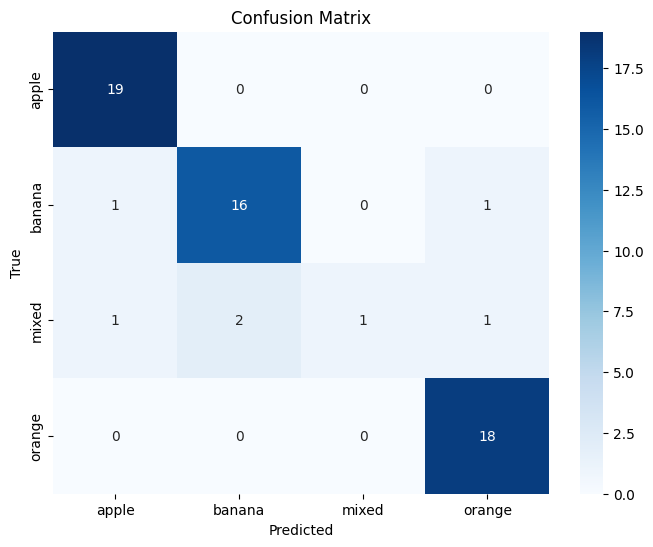

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(cnn_model.predict(X_test), axis=1)
y_true = np.argmax(y_test_categorical, axis=1)

print("classification report:")
print(classification_report(y_true, y_pred, target_names=le.classes_,zero_division=0))

print("confusion matrix:")
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
